# Investigation the scaling of the geometry optimization with random problems in different dimensions

Known: Each iteration in the solver takes $O(nd)$.   
Question: How many of these iterations are needed to converge? Intestigate this empirically.

The data which is evaluated here was generated using `/experiments/exp_geometry_optimization_scaling`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import sys
from tqdm.auto import tqdm

sys.path.append('../src/')

%load_ext autoreload
%autoreload 2

## Looking at the averag costs:

The convergence threshold makes no large difference here. Good!

In [19]:
num_dims_arr = np.array([2, 3, 4, 5, 10, 30, 50, 100])
threshold_arr = [1e-6, 1e-7, 1e-8]
num_terminals_arr = np.array([10,20,30,50,70,100,150,200,300,400,500,600,700,800,900,1000])
# num_terminals_arr = np.array([10,20])
num_problems = 1000

mean_cost_arr = np.zeros((len(num_dims_arr), len(num_terminals_arr),len(threshold_arr)))
mean_iter_arr = np.zeros((len(num_dims_arr),len(num_terminals_arr),len(threshold_arr)))
std_cost_arr = np.zeros((len(num_dims_arr),len(num_terminals_arr),len(threshold_arr)))
std_iter_arr = np.zeros((len(num_dims_arr),len(num_terminals_arr),len(threshold_arr)))

for k, dim in enumerate(num_dims_arr):
    for i,num_terminals in enumerate(num_terminals_arr):

        #load data:
        pkl_file_path = f"../results/output_files/geometry_iterations/Smith_alpha_dim{dim}_probs{num_problems}_size{num_terminals}_new.pkl"
        pkl_file = open(pkl_file_path, 'rb')
        large_results_dict = pickle.load(pkl_file)
        pkl_file.close()

        full_cost_arr = np.zeros((len(threshold_arr), num_problems))
        full_iter_arr = np.zeros((len(threshold_arr), num_problems))

        max_index = -1
        for thread_dict in large_results_dict:
            for key in thread_dict:
                # this counts through the different problems
                max_index += 1
                for j,threshold in enumerate(thread_dict[key]):
                    #print(max_index)
                    full_cost_arr[j,max_index] = thread_dict[key][threshold]["cost"]
                    full_iter_arr[j,max_index] = thread_dict[key][threshold]["num_iters"]


        mean_cost_arr[k,i,:] = np.mean(full_cost_arr, axis=1)
        std_cost_arr[k,i,:] = np.std(full_cost_arr, axis=1) 
        mean_iter_arr[k,i,:] = np.mean(full_iter_arr, axis=1)
        std_iter_arr[k,i,:] = np.std(full_iter_arr, axis=1)    

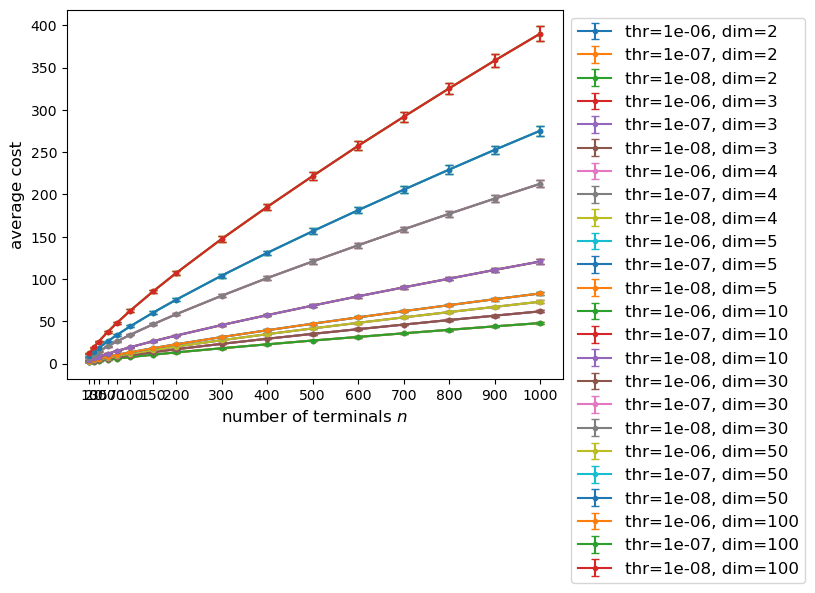

In [3]:
for k, dim in enumerate(num_dims_arr):
    for j,threshold in enumerate(threshold_arr):
        plt.errorbar(num_terminals_arr, mean_cost_arr[k,:,j], yerr=std_cost_arr[k,:,j], fmt=".-", capsize=3, label=f"thr={threshold}, dim={dim}")

plt.legend(fontsize= 12, bbox_to_anchor=(1, 1))
plt.ylabel("average cost", fontsize= 12)
plt.xlabel("number of terminals $n$", fontsize= 12)
plt.xticks(num_terminals_arr)
#plt.savefig("iter_conv.pdf", bbox_inches="tight")
plt.show()

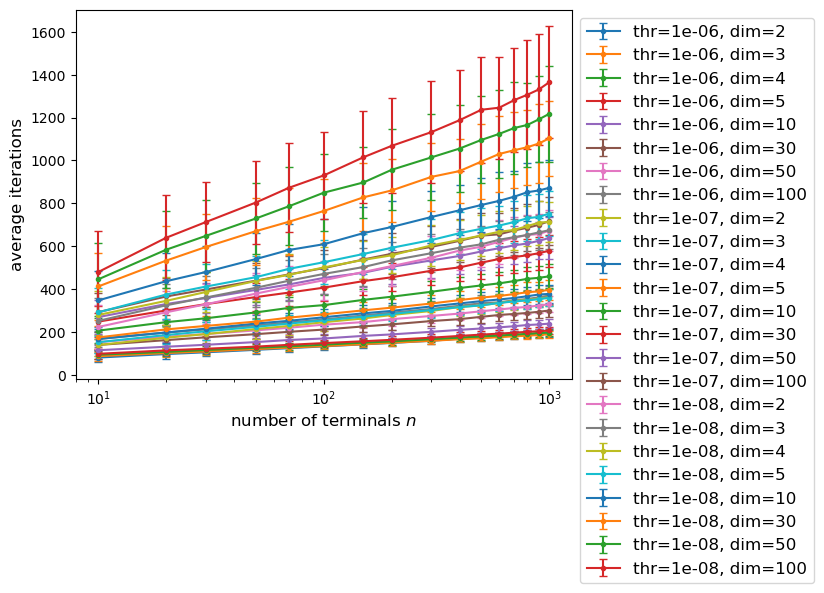

In [4]:
for j,threshold in enumerate(threshold_arr):
    for k, dim in enumerate(num_dims_arr):
        plt.errorbar(num_terminals_arr, mean_iter_arr[k,:,j], yerr=std_iter_arr[k,:,j], fmt=".-", capsize=3, label=f"thr={threshold}, dim={dim}")

plt.legend(fontsize= 12, bbox_to_anchor=(1, 1))
plt.ylabel("average iterations", fontsize= 12)
plt.xlabel("number of terminals $n$", fontsize= 12)
plt.xticks(num_terminals_arr)
plt.xscale("log")
#plt.savefig("iter_conv.pdf", bbox_inches="tight")
plt.show()

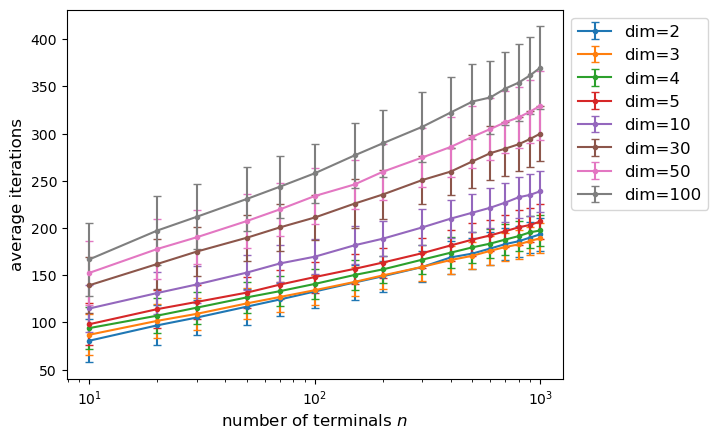

In [11]:
for j,threshold in enumerate(threshold_arr):
    if j > 0:
        continue
    for k, dim in enumerate(num_dims_arr):
        plt.errorbar(num_terminals_arr, mean_iter_arr[k,:,j], yerr=std_iter_arr[k,:,j], fmt=".-", capsize=3, label=f"dim={dim}")

plt.legend(fontsize= 12, bbox_to_anchor=(1, 1))
plt.ylabel("average iterations", fontsize= 12)
plt.xlabel("number of terminals $n$", fontsize= 12)
plt.xticks(num_terminals_arr)
plt.xscale("log")
#plt.savefig("iter_conv.pdf", bbox_inches="tight")
plt.show()

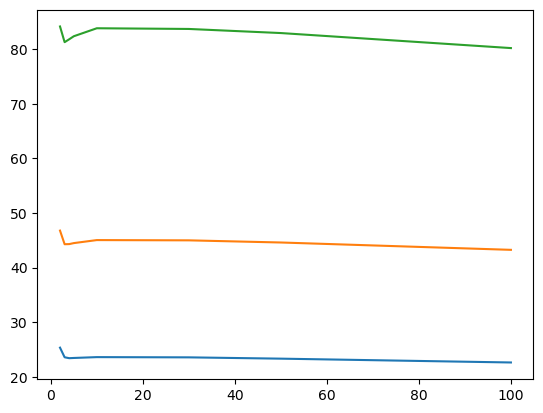

In [25]:
mean_divided = np.mean(mean_iter_arr[:,:,:] / np.log(num_terminals_arr)[None,:,None], axis=1)
for j,threshold in enumerate(threshold_arr):
    plt.plot(num_dims_arr, mean_divided[:,j] / num_dims_arr**0.2)
    # plt.plot(num_dims_arr, mean_divided[:,j])